In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']= (10,5)
plt.rcParams['figure.dpi']=250

In [2]:
#load the data

df=pd.read_excel(r"C:\Users\Prerana\Downloads\Airlines+Data.xlsx")
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


EDA

In [3]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


<AxesSubplot:>

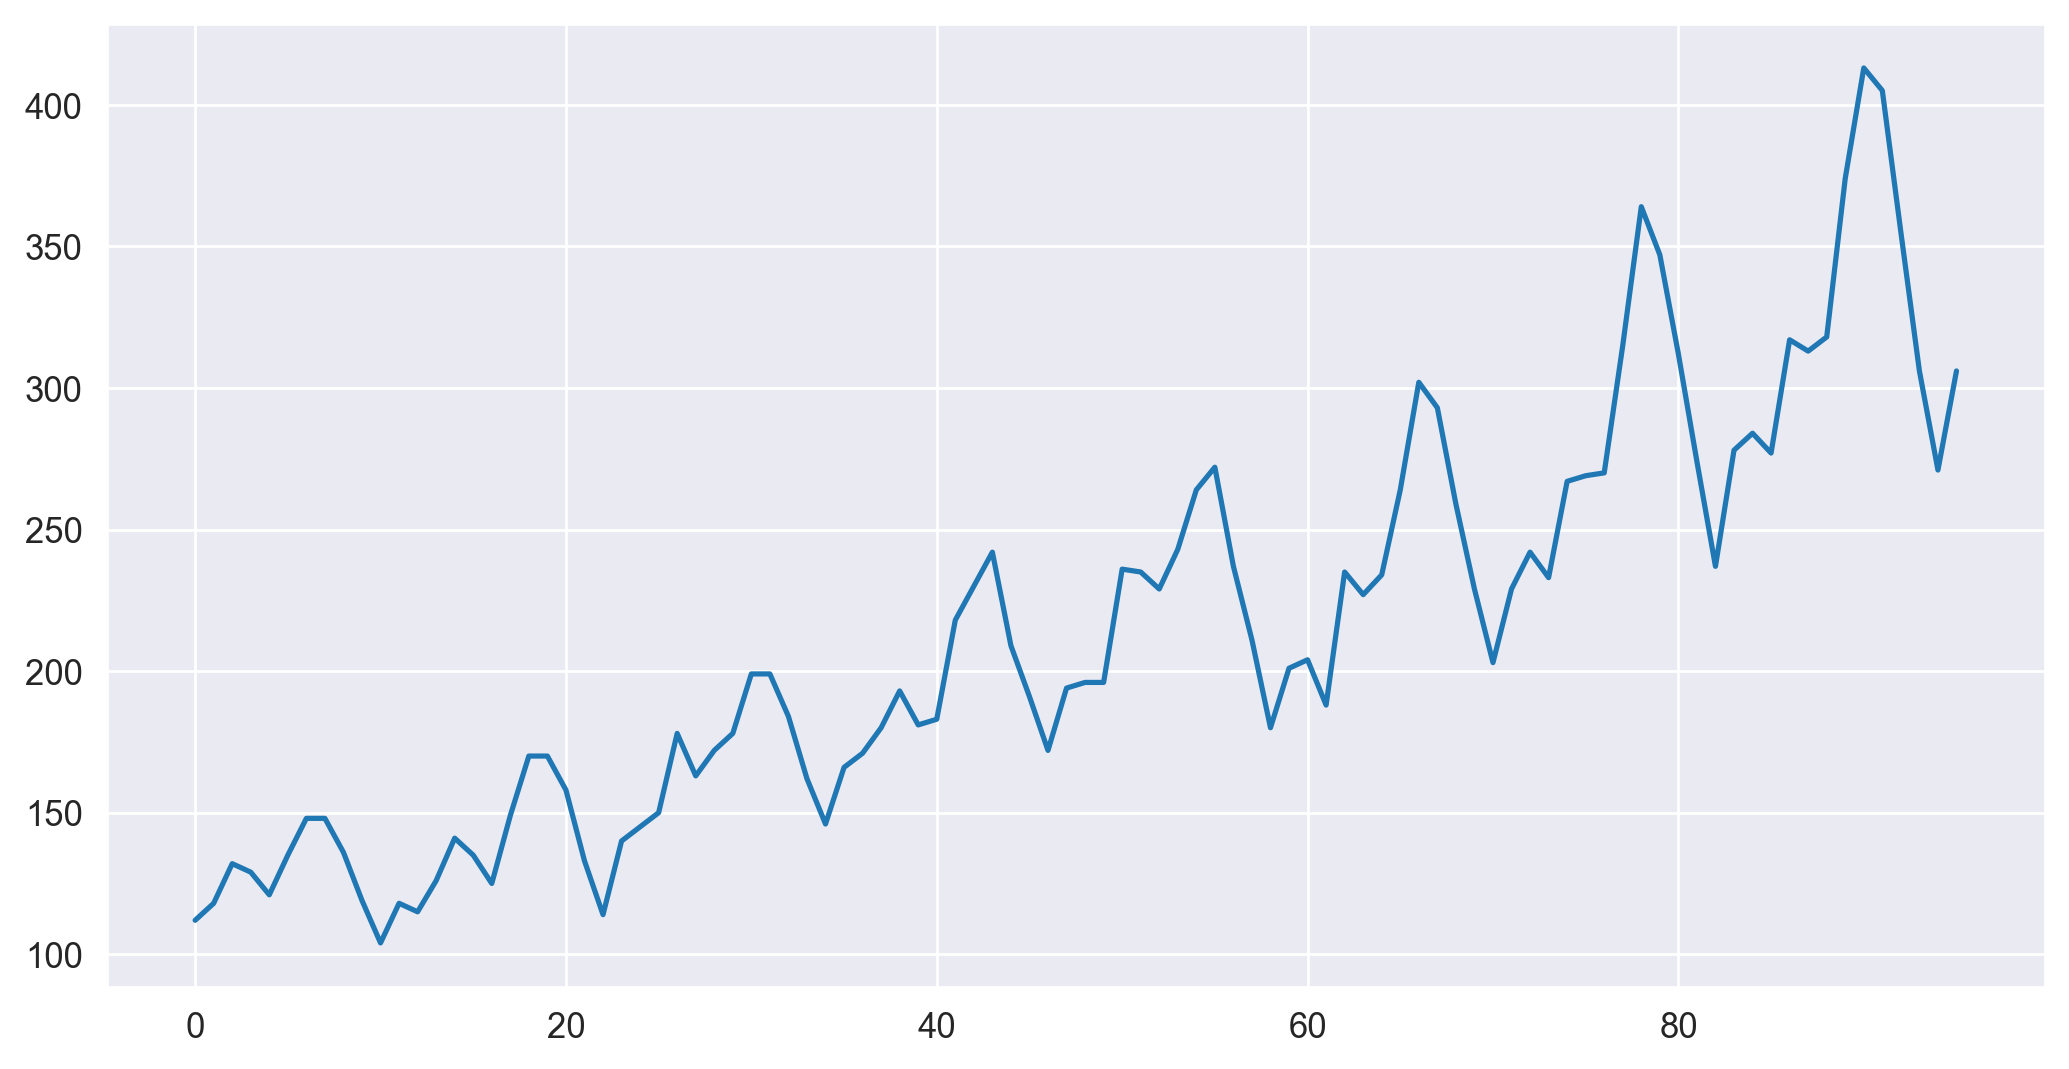

In [5]:
df.Passengers.plot()

Sorting the data

In [6]:
df['t']=np.arange(1,len(df)+1)
df['log_passengers']=np.log(df['Passengers'])
df['t_square']=df['t']*df['t']
df.head()

,Month,Passengers,t,log_passengers,t_square
0,1995-01-01,112,1,4.718499,1
1,1995-02-01,118,2,4.770685,4
2,1995-03-01,132,3,4.882802,9
3,1995-04-01,129,4,4.859812,16
4,1995-05-01,121,5,4.795791,25


In [7]:
df['Month']=pd.to_datetime(df['Month'])
df['Months']=df['Month'].dt.strftime('%b')
df.head()

,Month,Passengers,t,log_passengers,t_square,Months
0,1995-01-01,112,1,4.718499,1,Jan
1,1995-02-01,118,2,4.770685,4,Feb
2,1995-03-01,132,3,4.882802,9,Mar
3,1995-04-01,129,4,4.859812,16,Apr
4,1995-05-01,121,5,4.795791,25,May


In [8]:
month_dummies=pd.DataFrame(pd.get_dummies(df['Months']))

data=pd.concat([df,month_dummies],axis=1)
data.head()

,Month,Passengers,t,log_passengers,t_square,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1,4.718499,1,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,2,4.770685,4,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,4.882802,9,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,4,4.859812,16,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,4.795791,25,May,0,0,0,0,0,0,0,0,1,0,0,0


In [9]:
data['Year']=data['Month'].dt.strftime('%Y')
data

,Month,Passengers,t,log_passengers,t_square,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Year
0,1995-01-01,112,1,4.718499,1,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1995
1,1995-02-01,118,2,4.770685,4,Feb,0,0,0,1,0,0,0,0,0,0,0,0,1995
2,1995-03-01,132,3,4.882802,9,Mar,0,0,0,0,0,0,0,1,0,0,0,0,1995
3,1995-04-01,129,4,4.859812,16,Apr,1,0,0,0,0,0,0,0,0,0,0,0,1995
4,1995-05-01,121,5,4.795791,25,May,0,0,0,0,0,0,0,0,1,0,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,6.003887,8464,Aug,0,1,0,0,0,0,0,0,0,0,0,0,2002
92,2002-09-01,355,93,5.872118,8649,Sep,0,0,0,0,0,0,0,0,0,0,0,1,2002
93,2002-10-01,306,94,5.723585,8836,Oct,0,0,0,0,0,0,0,0,0,0,1,0,2002
94,2002-11-01,271,95,5.602119,9025,Nov,0,0,0,0,0,0,0,0,0,1,0,0,2002


In [10]:
data.shape

(96, 19)

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

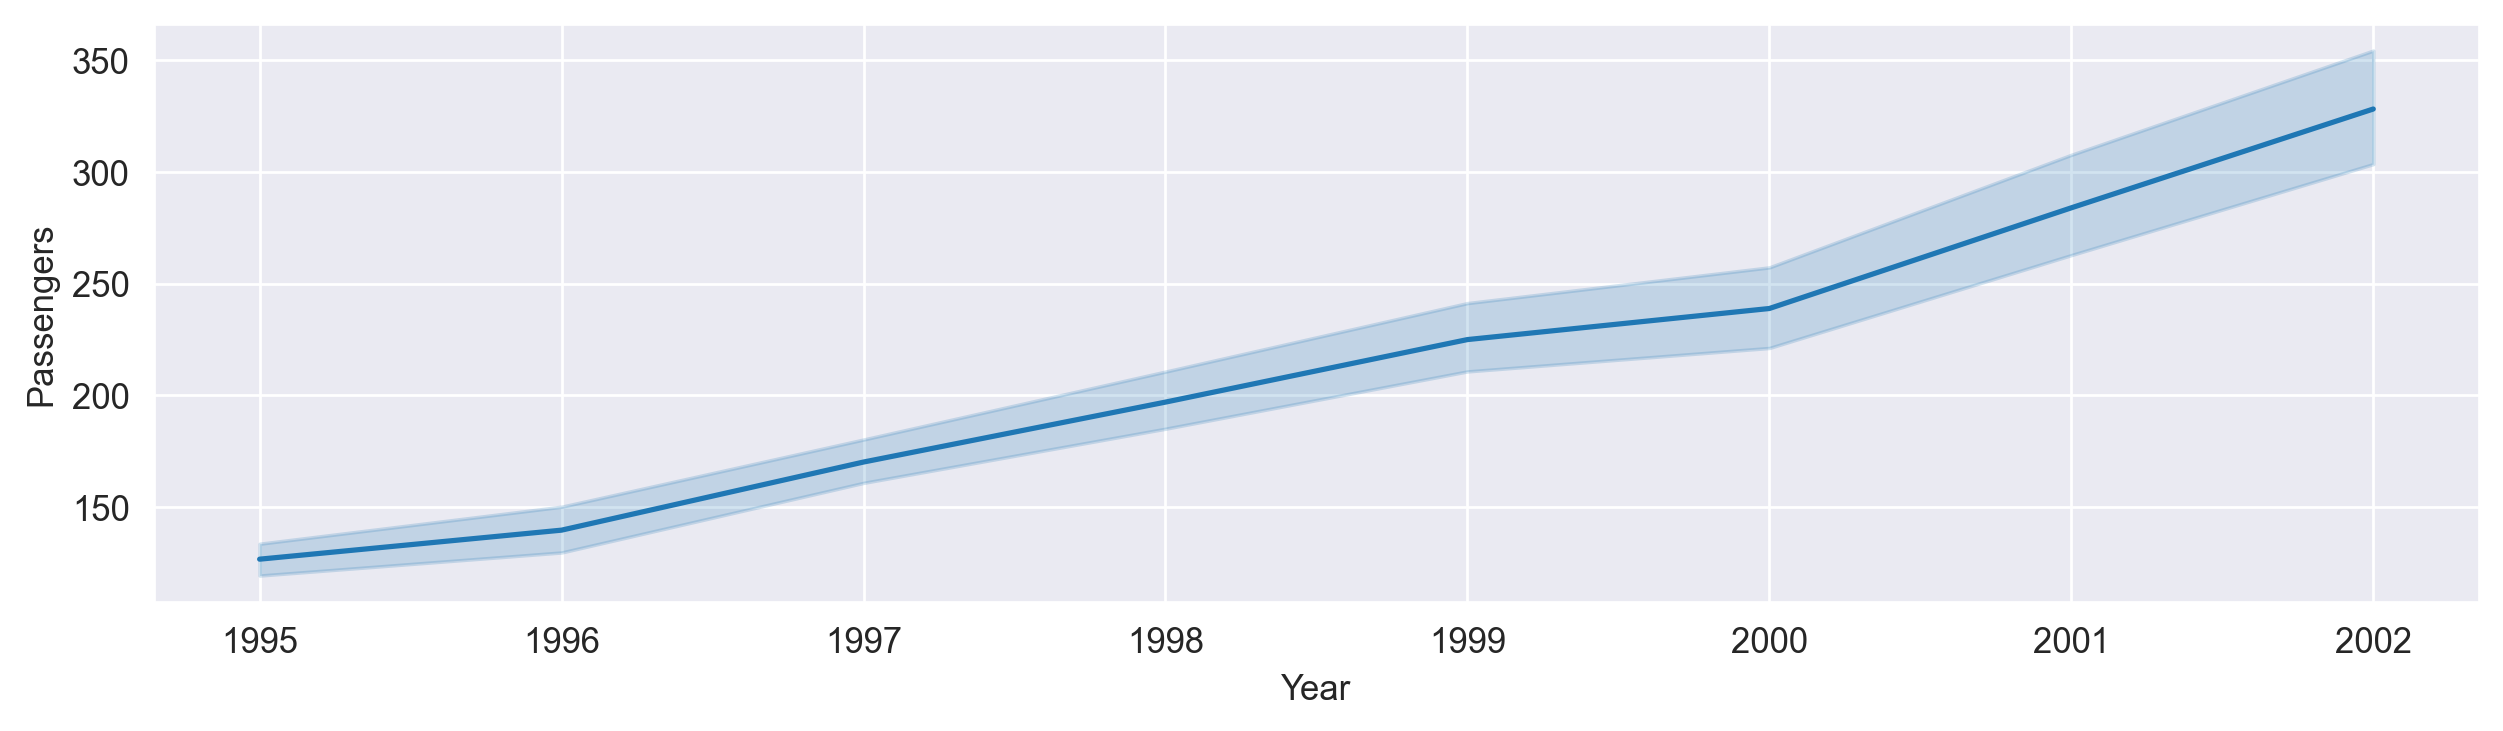

In [11]:
plt.figure(figsize=(12,3))
sns.lineplot(x='Year',y='Passengers',data=data)

In [12]:
#Spilting the data

Train=data.head(80)
Test=data.tail(16)

In [13]:
Train

,Month,Passengers,t,log_passengers,t_square,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Year
0,1995-01-01,112,1,4.718499,1,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1995
1,1995-02-01,118,2,4.770685,4,Feb,0,0,0,1,0,0,0,0,0,0,0,0,1995
2,1995-03-01,132,3,4.882802,9,Mar,0,0,0,0,0,0,0,1,0,0,0,0,1995
3,1995-04-01,129,4,4.859812,16,Apr,1,0,0,0,0,0,0,0,0,0,0,0,1995
4,1995-05-01,121,5,4.795791,25,May,0,0,0,0,0,0,0,0,1,0,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2001-04-01,269,76,5.594711,5776,Apr,1,0,0,0,0,0,0,0,0,0,0,0,2001
76,2001-05-01,270,77,5.598422,5929,May,0,0,0,0,0,0,0,0,1,0,0,0,2001
77,2001-06-01,315,78,5.752573,6084,Jun,0,0,0,0,0,0,1,0,0,0,0,0,2001
78,2001-07-01,364,79,5.897154,6241,Jul,0,0,0,0,0,1,0,0,0,0,0,0,2001


In [14]:
Test

,Month,Passengers,t,log_passengers,t_square,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Year
80,2001-09-01,312,81,5.743003,6561,Sep,0,0,0,0,0,0,0,0,0,0,0,1,2001
81,2001-10-01,274,82,5.613128,6724,Oct,0,0,0,0,0,0,0,0,0,0,1,0,2001
82,2001-11-01,237,83,5.468060,6889,Nov,0,0,0,0,0,0,0,0,0,1,0,0,2001
83,2001-12-01,278,84,5.627621,7056,Dec,0,0,1,0,0,0,0,0,0,0,0,0,2001
84,2002-01-01,284,85,5.648974,7225,Jan,0,0,0,0,1,0,0,0,0,0,0,0,2002
85,2002-02-01,277,86,5.624018,7396,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2002
86,2002-03-01,317,87,5.758902,7569,Mar,0,0,0,0,0,0,0,1,0,0,0,0,2002
87,2002-04-01,313,88,5.746203,7744,Apr,1,0,0,0,0,0,0,0,0,0,0,0,2002
88,2002-05-01,318,89,5.762051,7921,May,0,0,0,0,0,0,0,0,1,0,0,0,2002
89,2002-06-01,374,90,5.924256,8100,Jun,0,0,0,0,0,0,1,0,0,0,0,0,2002


# Model building

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model=smf.ols('Passengers~t',data=Train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test["t"])))
rmse_linear=np.sqrt(mean_squared_error(Test['Passengers'],pred_linear))
rmse_linear

47.542624067726805

In [17]:
#Exponential

Exp=smf.ols('log_passengers~t',data=Train).fit()
pred_exp=pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_exp=np.sqrt(mean_squared_error(Test['Passengers'],pred_exp))
rmse_exp

312.8892354482463

In [18]:
#Quadratic

Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_quad=pd.Series(Quad.predict(pd.DataFrame(Test[["t","t_square"]])))
rmse_quad=np.sqrt(mean_squared_error(Test['Passengers'],pred_quad))
rmse_quad

43.65440369584204

In [19]:
#Additive Seasonality

add= smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add=pd.Series(add.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add=np.sqrt(mean_squared_error(Test['Passengers'],pred_add))
rmse_add

129.26647641443313

In [20]:
#Additive Seasonality with quadratic

add_quad=smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_quad=pd.Series(add_quad.predict(Test[["t","t_square",'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_quad=np.sqrt(mean_squared_error(Test['Passengers'],pred_add_quad))
rmse_add_quad

23.910983570105575

In [22]:
#Multiplicative seasonality

mul=smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_mul=pd.Series(mul.predict(Test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_mul=np.sqrt(mean_squared_error(Test['Passengers'],pred_mul))
rmse_mul

312.90871517511727

In [23]:
#compare the results

d1={'MODEL': pd.Series(['rmse_linear','rmse_exp','rmse_quad','rmse_add','rmse_add_quad','rmse_mul']),'RMSE_values':pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add,rmse_add_quad,rmse_mul])}
table_rmse=pd.DataFrame(d1)
table_rmse.sort_values(['RMSE_values'])

,MODEL,RMSE_values
4,rmse_add_quad,23.910984
2,rmse_quad,43.654404
0,rmse_linear,47.542624
3,rmse_add,129.266476
1,rmse_exp,312.889235
5,rmse_mul,312.908715


The best model is Additive Seasonality with quadratic trend.